In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
data = pd.read_csv("C:\\Users\\DELL\\Downloads\\50_Startups.csv")

In [3]:
print (data)

    R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida  141585.52
13   91992.39       

In [4]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
le = LabelEncoder()
label = le.fit_transform(data['State'])
label

array([2, 0, 1, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 0, 1, 2, 0, 2, 1, 2, 0, 2,
       1, 1, 2, 0, 1, 2, 1, 2, 1, 2, 0, 1, 0, 2, 1, 0, 2, 0, 0, 1, 0, 2,
       0, 2, 1, 0, 2, 0])

In [7]:
le.classes_

array(['California', 'Florida', 'New York'], dtype=object)

In [8]:
new_data = data

In [9]:
data.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [10]:
data = new_data.drop("State",axis='columns')
data.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [11]:
data['state'] = label

In [12]:
data.head()

,R&D Spend,Administration,Marketing Spend,Profit,state
0,165349.20,136897.80,471784.10,192261.83,2
1,162597.70,151377.59,443898.53,191792.06,0
2,153441.51,101145.55,407934.54,191050.39,1
3,144372.41,118671.85,383199.62,182901.99,2
4,142107.34,91391.77,366168.42,166187.94,1


In [13]:
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

In [14]:
data.values

array([[1.6534920e+05, 1.3689780e+05, 4.7178410e+05, 1.9226183e+05,
        2.0000000e+00],
       [1.6259770e+05, 1.5137759e+05, 4.4389853e+05, 1.9179206e+05,
        0.0000000e+00],
       [1.5344151e+05, 1.0114555e+05, 4.0793454e+05, 1.9105039e+05,
        1.0000000e+00],
       [1.4437241e+05, 1.1867185e+05, 3.8319962e+05, 1.8290199e+05,
        2.0000000e+00],
       [1.4210734e+05, 9.1391770e+04, 3.6616842e+05, 1.6618794e+05,
        1.0000000e+00],
       [1.3187690e+05, 9.9814710e+04, 3.6286136e+05, 1.5699112e+05,
        2.0000000e+00],
       [1.3461546e+05, 1.4719887e+05, 1.2771682e+05, 1.5612251e+05,
        0.0000000e+00],
       [1.3029813e+05, 1.4553006e+05, 3.2387668e+05, 1.5575260e+05,
        1.0000000e+00],
       [1.2054252e+05, 1.4871895e+05, 3.1161329e+05, 1.5221177e+05,
        2.0000000e+00],
       [1.2333488e+05, 1.0867917e+05, 3.0498162e+05, 1.4975996e+05,
        0.0000000e+00],
       [1.0191308e+05, 1.1059411e+05, 2.2916095e+05, 1.4612195e+05,
        1.00

In [15]:
array = data.values
scaler = MinMaxScaler(feature_range = (0,1))
rescaledx = scaler.fit_transform (array)
# transformed data
set_printoptions(precision=2)
print(rescaledx[0:5,:])

[[1.   0.65 1.   1.   1.  ]
 [0.98 0.76 0.94 1.   0.  ]
 [0.93 0.38 0.86 0.99 0.5 ]
 [0.87 0.51 0.81 0.95 1.  ]
 [0.86 0.31 0.78 0.85 0.5 ]]


<AxesSubplot:>

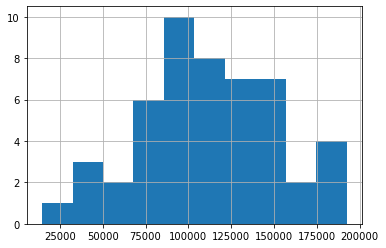

In [16]:
data['Profit'].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x1f7ce99f280>,
 'caps': [<matplotlib.lines.Line2D at 0x1f7ce99f940>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f7ce98eee0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f7ce9a7040>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f7ce9a73a0>],
 'means': []}

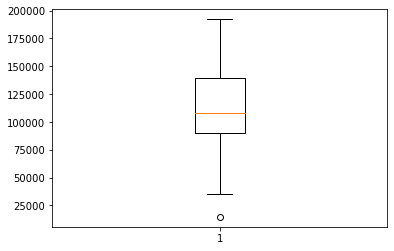

In [17]:
data_box=data.dropna()
data1_box=data_box.Profit
plt.boxplot(data1_box)

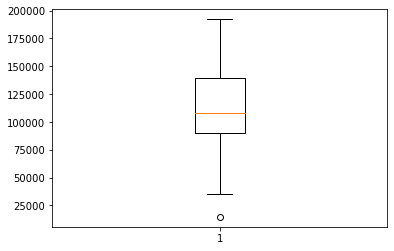

In [18]:
box=plt.boxplot(data1_box)

In [19]:
[item.get_ydata() for item in box['fliers']]

[array([14681.4])]

In [20]:
[item.get_ydata()[1] for item in box['whiskers']]

[35673.41, 192261.83]

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
 4   state            50 non-null     int32  
dtypes: float64(4), int32(1)
memory usage: 1.9 KB


In [22]:
data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
state              0
dtype: int64

# correlation matrix

In [23]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit,state
R&D Spend,1.000000,0.241955,0.724248,0.972900,0.104685
Administration,0.241955,1.000000,-0.032154,0.200717,0.011847
Marketing Spend,0.724248,-0.032154,1.000000,0.747766,0.077670
Profit,0.972900,0.200717,0.747766,1.000000,0.101796
state,0.104685,0.011847,0.077670,0.101796,1.000000


# scatter plot

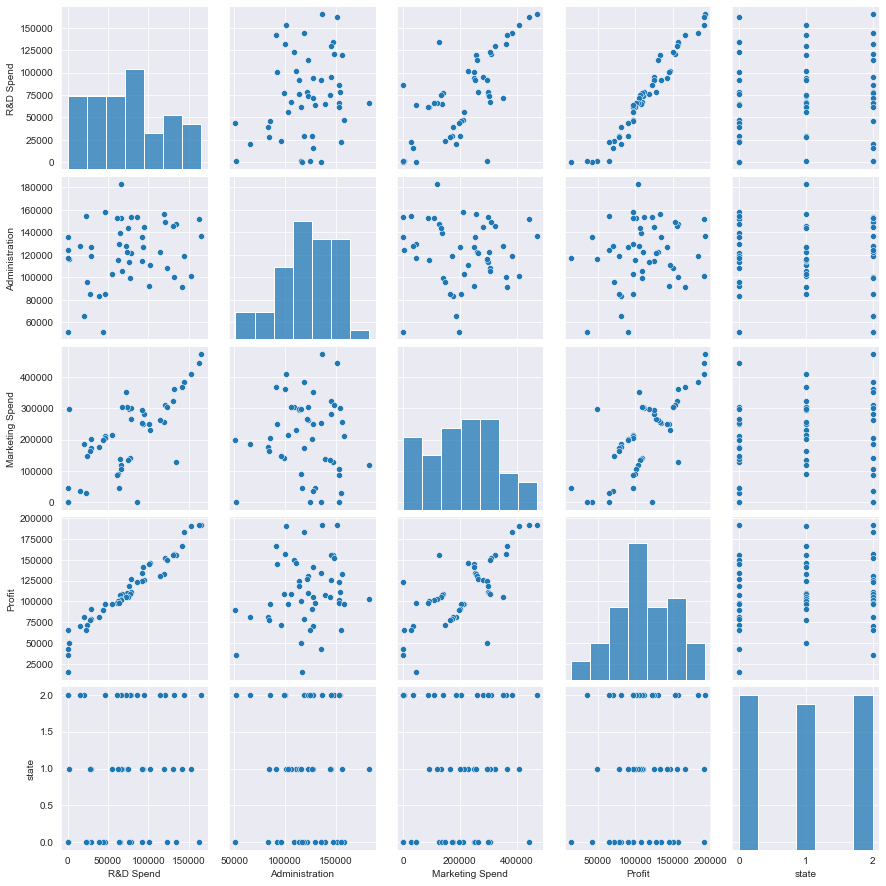

In [24]:
sns.set_style(style='darkgrid')
sns.pairplot(data)

In [25]:
data = data.rename({'R&D Spend':'r_and_d_spend','Marketing Spend':
                    'marketing_spend','Administration':'administration','Profit':'profit','State':'state'},axis=1)

In [26]:
data.head()

,r_and_d_spend,administration,marketing_spend,profit,state
0,165349.20,136897.80,471784.10,192261.83,2
1,162597.70,151377.59,443898.53,191792.06,0
2,153441.51,101145.55,407934.54,191050.39,1
3,144372.41,118671.85,383199.62,182901.99,2
4,142107.34,91391.77,366168.42,166187.94,1


# prpearing models

In [27]:
import statsmodels.formula.api as smf

In [28]:
model = smf.ols('profit~r_and_d_spend+administration+marketing_spend+state',data = data).fit()

In [29]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Wed, 01 Dec 2021   Prob (F-statistic):           8.51e-29
Time:                        22:29:36   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.014e+04   6804.555      7.369      0.000    3.64e+04    6.38e+04
r_and_d_spend       0.8058      0.046     17.609      0.000       0.714       0.898
administration     -0.0268      0.052     -0.520      0.606      -0.131       0.077
marketing_spend     0.0272      0.017      1.637      0.109      -0.006       0.061
state             -22.3206   1609.829     -0.014      0.989   -3264.682    3220.041
==============================================================================
Omnibus:                       14.864   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.542
Skew:                          -0.949   Prob(JB):                     2.10e-05
Kurtosis:                       5.596   Cond. No.                     1.44e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
model.params

Intercept          50142.506443
r_and_d_spend          0.805760
administration        -0.026826
marketing_spend        0.027228
state                -22.320577
dtype: float64

In [31]:
print(model.tvalues, model.pvalues)

Intercept           7.368962
r_and_d_spend      17.608621
administration     -0.519906
marketing_spend     1.636966
state              -0.013865
dtype: float64 Intercept          2.900008e-09
r_and_d_spend      8.249206e-22
administration     6.056771e-01
marketing_spend    1.086131e-01
state              9.889988e-01
dtype: float64


In [32]:
(model.rsquared,model.rsquared_adj)

(0.9507462044842656, 0.9463680893273114)

# Calculating VIF

In [33]:
rsq_r = smf.ols('r_and_d_spend~administration+marketing_spend+state',data=data).fit().rsquared
vif_r = 1/(1-rsq_r)
rsq_a = smf.ols('administration~r_and_d_spend+marketing_spend+state',data=data).fit().rsquared
vif_a = 1/(1-rsq_a)
rsq_m = smf.ols('marketing_spend~administration+r_and_d_spend+state',data=data).fit().rsquared
vif_m = 1/(1-rsq_m)
rsq_s = smf.ols('state~r_and_d_spend+marketing_spend+administration',data=data).fit().rsquared
vif_s = 1/(1-rsq_s)

d1 = {'Variables':['state','r_and_d_spend','marketing_spend','administration'],'VIF':[vif_r,vif_a,vif_m,vif_s]}
Vif_frame = pd.DataFrame(d1)
Vif_frame

,Variables,VIF
0,state,2.481178
1,r_and_d_spend,1.175315
2,marketing_spend,2.326780
3,administration,1.011281


# Test for Normality of Residuals (Q-Q Plot)

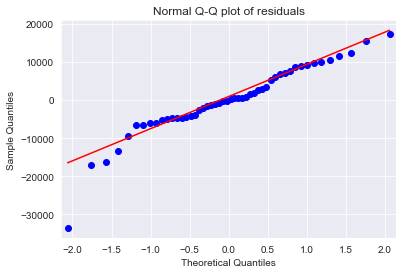

In [34]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [35]:
(np.where(model.resid>10))

(array([ 1,  2,  3,  8, 10, 11, 12, 13, 16, 19, 20, 25, 28, 30, 34, 35, 36,
        37, 38, 40, 41, 42, 43, 44, 45], dtype=int64),)

# Residual Plot for Homoscedasticity

In [36]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

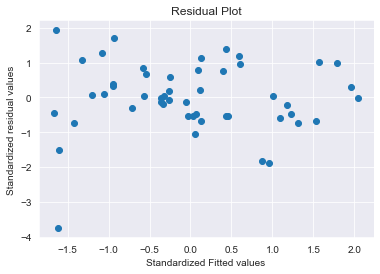

In [37]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# Residual Vs Regressors

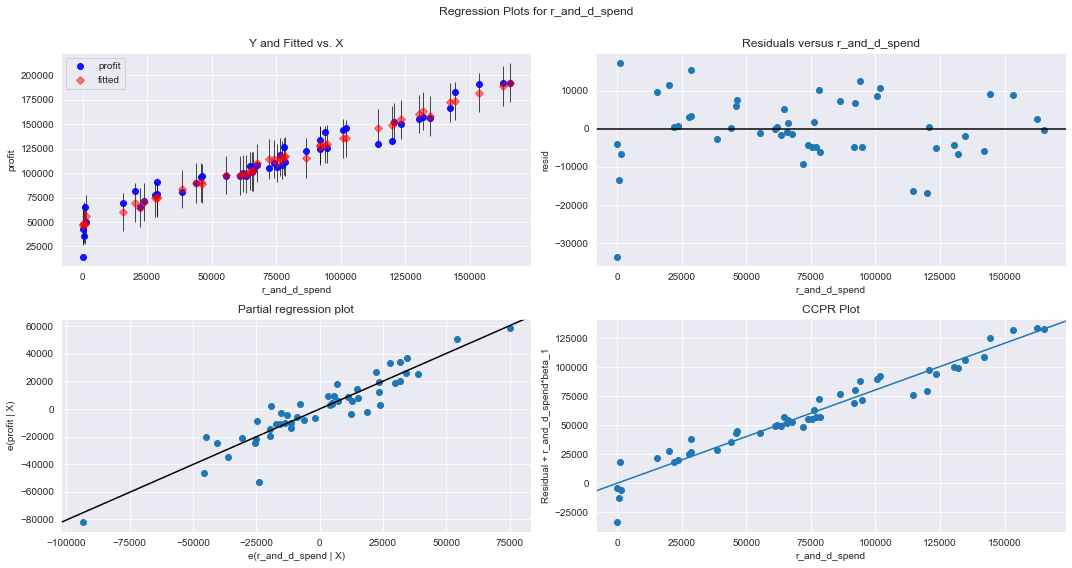

In [38]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "r_and_d_spend", fig=fig)
plt.show()

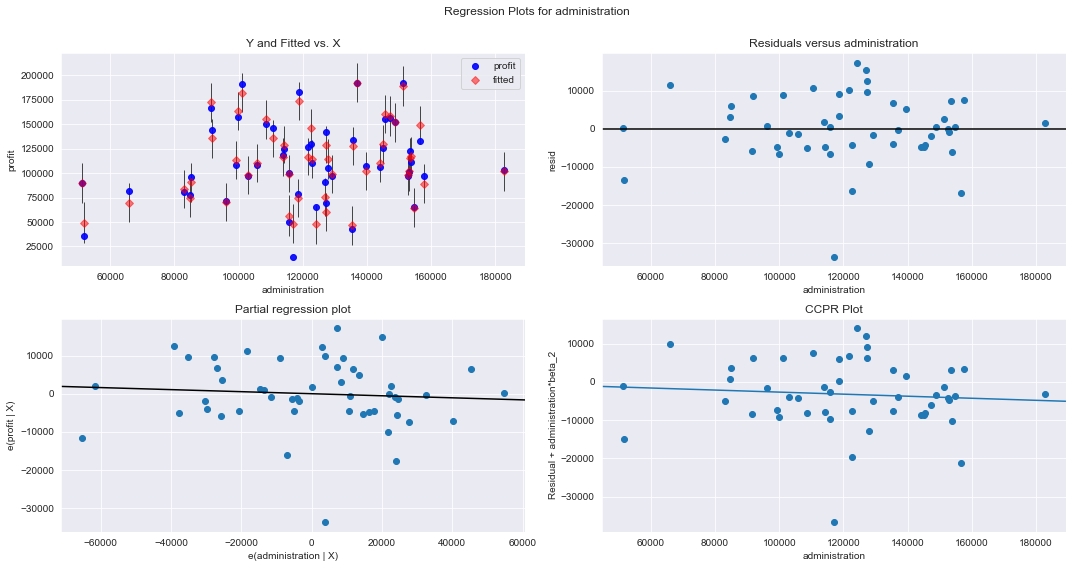

In [39]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "administration", fig=fig)
plt.show()

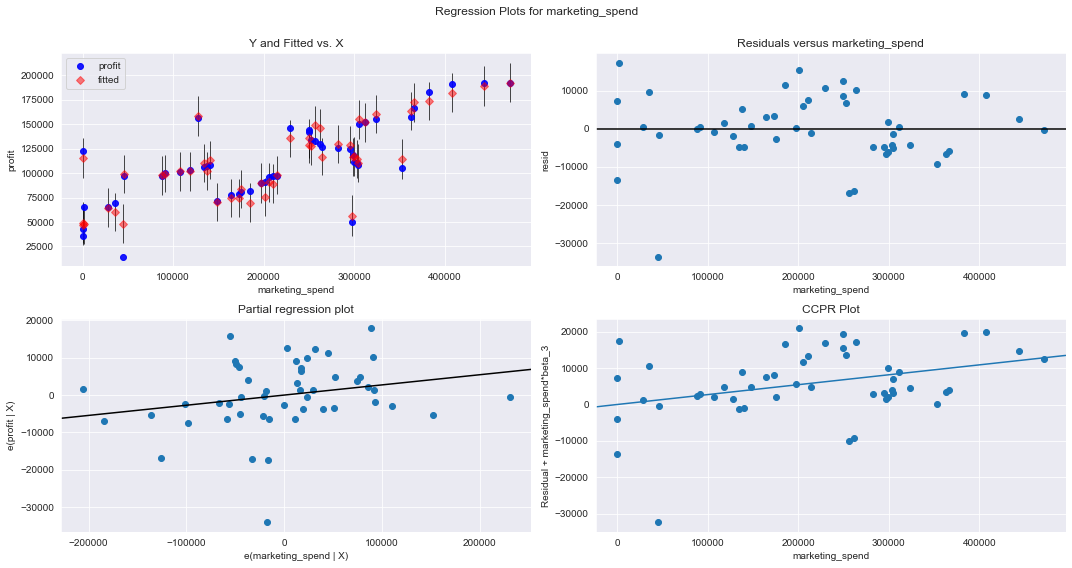

In [40]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "marketing_spend", fig=fig)
plt.show()

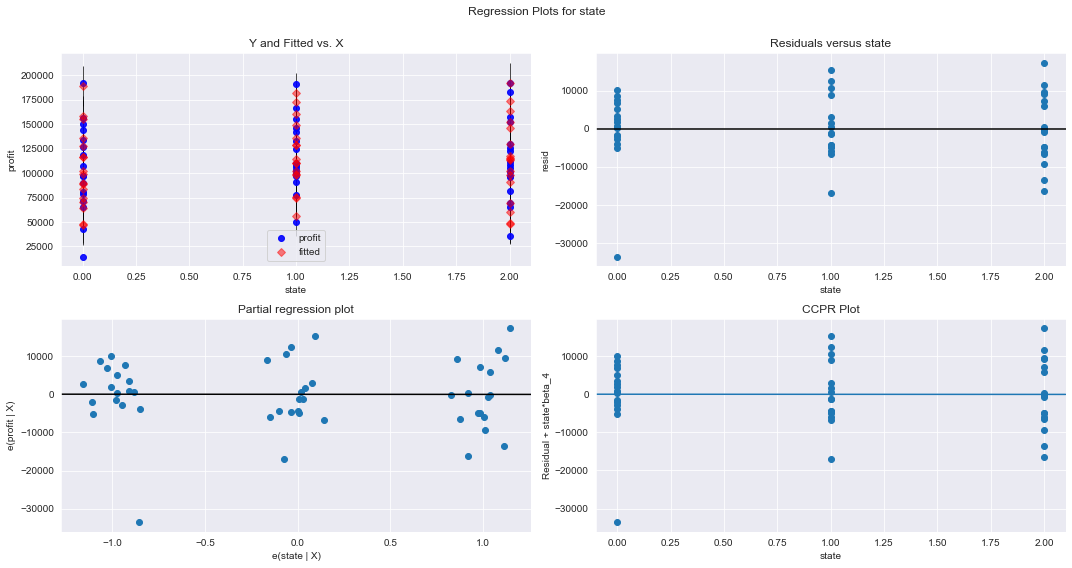

In [41]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "state", fig=fig)
plt.show()

# Cook’s Distance

In [42]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

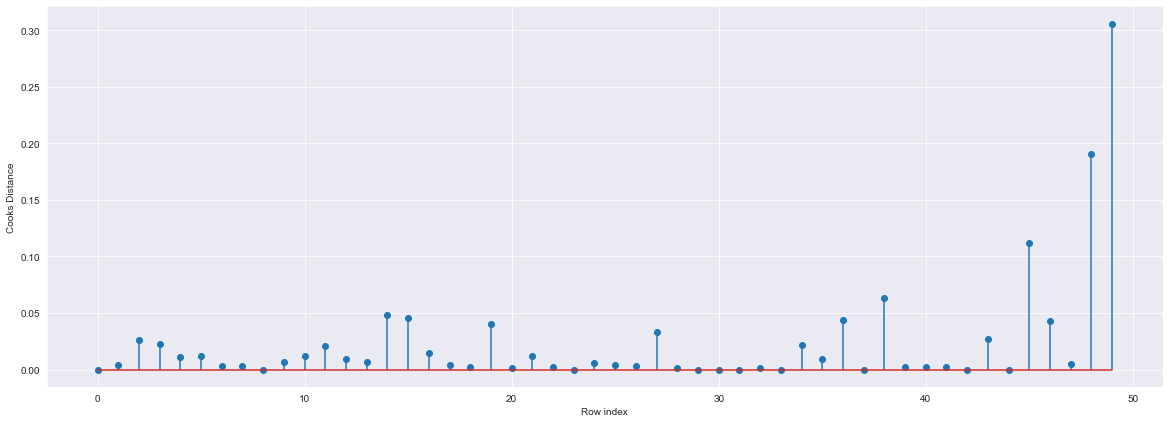

In [43]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [44]:
(np.argmax(c),np.max(c))

(49, 0.3060281954699332)

# High Influence points

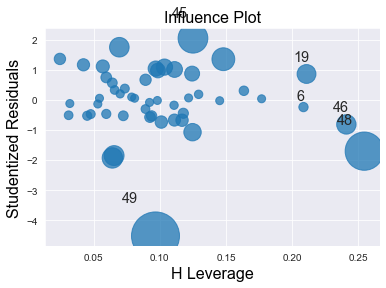

In [45]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [46]:
k = data.shape[1]
n = data.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [47]:
data[data.index.isin([48, 49])]

,r_and_d_spend,administration,marketing_spend,profit,state
48,542.05,51743.15,0.00,35673.41,2
49,0.00,116983.80,45173.06,14681.40,0


In [48]:
data.head()

,r_and_d_spend,administration,marketing_spend,profit,state
0,165349.20,136897.80,471784.10,192261.83,2
1,162597.70,151377.59,443898.53,191792.06,0
2,153441.51,101145.55,407934.54,191050.39,1
3,144372.41,118671.85,383199.62,182901.99,2
4,142107.34,91391.77,366168.42,166187.94,1


# Improving the model

In [49]:
new_data = pd.read_csv("C:\\Users\\DELL\\Downloads\\50_Startups.csv")

In [50]:
data1=new_data.drop(new_data.index[[48,49]],axis=0).reset_index()

In [51]:
data1=data1.drop(['index'],axis=1)

In [52]:
data1.shape

(48, 5)

# Build model

In [53]:
final_ml_p = smf.ols('profit~r_and_d_spend+marketing_spend+administration',data=data).fit()

In [54]:
(final_ml_p.rsquared,final_ml_p.aic)

(0.9507459940683246, 1058.7714985998055)

# Predicting for new data

In [55]:
new_data1 = pd.DataFrame({'r_and_d_spend':50,'marketing_spend':100,'administration':150},index=[1])

In [56]:
final_ml_p.predict(new_data1)

1    50161.179154
dtype: float64

In [57]:
final_ml_p.predict(data.iloc[0:5,])

0    192521.252890
1    189156.768232
2    182147.279096
3    173696.700026
4    172139.514183
dtype: float64

In [58]:
pred_y = final_ml_p.predict(data)

In [59]:
pred_y.head()

0    192521.252890
1    189156.768232
2    182147.279096
3    173696.700026
4    172139.514183
dtype: float64

# RMSE

In [60]:
import numpy as np

In [61]:
np.sqrt(np.mean(data.profit-pred_y)**2)

2.648448571562767e-11